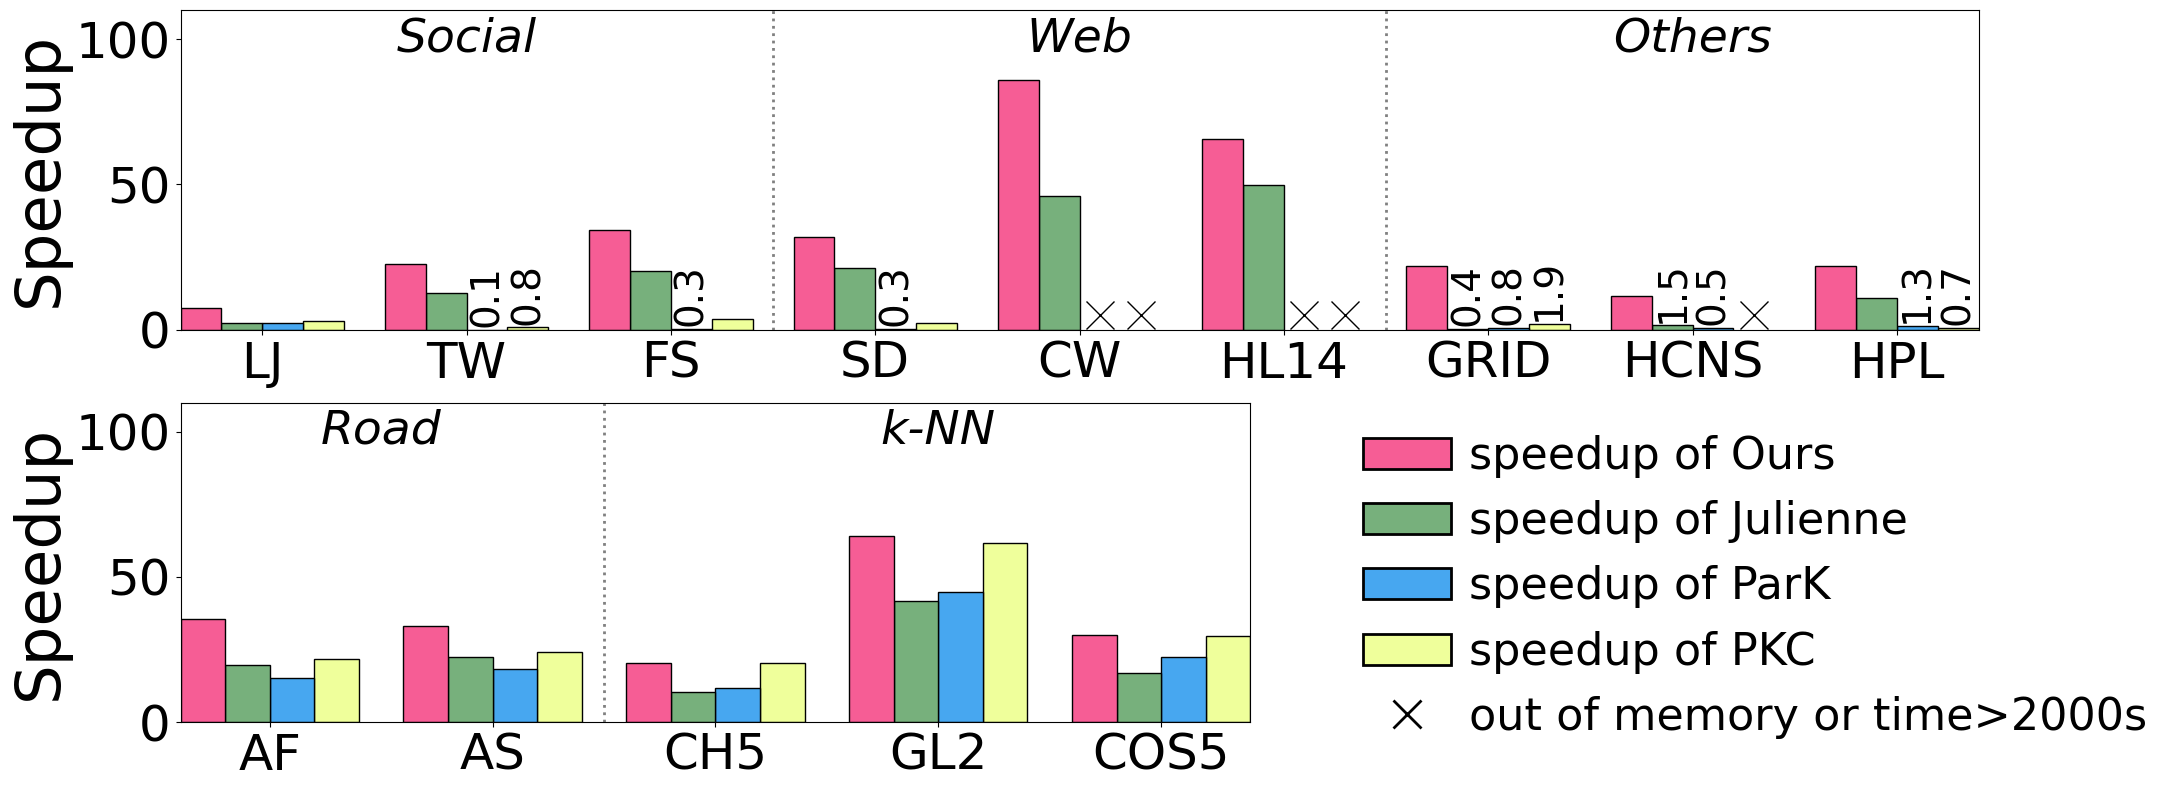

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import matplotlib.patheffects as pe
from matplotlib.patches import FancyBboxPatch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

file_path = './../data/speedup_over_seq_select.csv'
data = pd.read_csv(file_path, keep_default_na=False)
data.columns = data.columns.str.strip()

data['speedup PKC'] = pd.to_numeric(data['speedup PKC'], errors='coerce')
data['speedup GBBS'] = pd.to_numeric(data['speedup GBBS'], errors='coerce')
data['speedup ParK'] = pd.to_numeric(data['speedup ParK'], errors='coerce')
data['speedup Ours'] = pd.to_numeric(data['speedup Ours'], errors='coerce')
data['Seq'] = pd.to_numeric(data['Seq'], errors='coerce')

categories = data['Category'].unique()

palette = ["#EFFF9B", "#47A7F0", "#77B07C", "#F65D95"]

# Create a gridspec layout with equal height rows but different widths
fig = plt.figure(figsize=(20, 8))  # Define overall figure size
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1.5, 1])  # Equal height for both rows

# First subplot spans full width of the first row
ax1 = fig.add_subplot(gs[0, :])

# Second subplot only takes the first column of the second row
ax2 = fig.add_subplot(gs[1, 0])

def plot_bars(ax, data_subset, y_limit):
    index = 0
    bar_width = 0.2
    category_positions = []
    
    if y_limit >= 10:
        ax.set_ylim([0, y_limit + 20])
    else:
        ax.set_ylim([0, y_limit + 10])
    subset_categories = data_subset['Category'].unique()
    
    for category in subset_categories:
        subset = data_subset[data_subset['Category'] == category]
        category_index = np.arange(len(subset)) + index

        limited_pkc = subset['speedup PKC'].apply(lambda x: min(x, y_limit) if pd.notna(x) else x)
        limited_gbbs = subset['speedup GBBS'].apply(lambda x: min(x, y_limit) if pd.notna(x) else x)
        limited_park = subset['speedup ParK'].apply(lambda x: min(x, y_limit) if pd.notna(x) else x)
        limited_ours = subset['speedup Ours'].apply(lambda x: min(x, y_limit) if pd.notna(x) else x)

        bars1 = ax.bar(category_index + bar_width * 1.5, limited_pkc, bar_width, label='Speedup PKC', color=palette[0], edgecolor='black')
        bars2 = ax.bar(category_index + bar_width * 0.5, limited_park, bar_width, label='Speedup ParK', color=palette[1], edgecolor='black')
        bars3 = ax.bar(category_index - bar_width * 0.5, limited_gbbs, bar_width, label='Speedup GBBS', color=palette[2], edgecolor='black')
        bars4 = ax.bar(category_index - bar_width * 1.5, limited_ours, bar_width, label='Speedup Ours', color=palette[3], edgecolor='black')

        for i, (bar1, bar2, bar3, bar4) in enumerate(zip(bars1, bars2, bars3, bars4)):
            pkc_value = subset.iloc[i]['speedup PKC']
            park_value = subset.iloc[i]['speedup ParK']
            gbbs_value = subset.iloc[i]['speedup GBBS']
            ours_value = subset.iloc[i]['speedup Ours']

            if pd.isna(pkc_value):
                ax.plot(bar1.get_x() + bar1.get_width() / 2, 5, 'kx', markersize=20, label='_nolegend_')
            elif pkc_value > y_limit:
                ax.text(bar1.get_x() + bar1.get_width() / 2, y_limit + 1, f'{pkc_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            elif pkc_value < 2:
                ax.text(bar1.get_x() + bar1.get_width() / 2, pkc_value + 1, f'{pkc_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            
            if pd.isna(park_value):
                ax.plot(bar2.get_x() + bar2.get_width() / 2, 5, 'kx', markersize=20, label='_nolegend_')
            elif park_value > y_limit:
                ax.text(bar2.get_x() + bar2.get_width() / 2, y_limit + 1, f'{park_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            elif park_value < 2:
                ax.text(bar2.get_x() + bar2.get_width() / 2, park_value + 1, f'{park_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            
            if pd.isna(gbbs_value):
                ax.plot(bar3.get_x() + bar3.get_width() / 2, 5, 'kx', markersize=20, label='_nolegend_')
            elif gbbs_value > y_limit:
                ax.text(bar3.get_x() + bar3.get_width() / 2, y_limit + 1, f'{gbbs_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            elif gbbs_value < 2:
                ax.text(bar3.get_x() + bar3.get_width() / 2, gbbs_value + 1, f'{gbbs_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            
            if pd.isna(ours_value):
                ax.plot(bar4.get_x() + bar4.get_width() / 2, 5, 'kx', markersize=20, label='_nolegend_')
            elif ours_value > y_limit:
                ax.text(bar4.get_x() + bar4.get_width() / 2, y_limit + 1, f'{ours_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            elif ours_value < 2:
                ax.text(bar4.get_x() + bar4.get_width() / 2, ours_value + 1, f'{ours_value:.1f}', ha='center', va='bottom', fontsize=32, color='black', rotation=90)


        category_start = category_index[0] - bar_width
        category_end = category_index[-1] + bar_width
        category_midpoint = (category_start + category_end) / 2
        category_positions.append((category_start, category_end, category_midpoint))

        index += len(subset)

    ax.set_xticks(np.arange(len(data_subset)))
    ax.set_xticklabels(data_subset['Graph'], rotation=0, fontsize=36)
    ax.tick_params(axis='both', which='major', labelsize=36)
    
    for i in range(len(category_positions) - 1):
        midpoint = (category_positions[i][1] + category_positions[i + 1][0]) / 2
        ax.axvline(x=midpoint, color='grey', linestyle=':', linewidth=2, label='_nolegend_')

    for position, category in zip(category_positions, subset_categories):
        ax.text(position[2], 0.98, category, ha='center', va='top', fontsize=34, 
                transform=ax.get_xaxis_transform(), fontstyle='italic')

    ax.set_xlim([min(np.arange(len(data_subset))) - bar_width * 2,
                 max(np.arange(len(data_subset))) + bar_width * 2])
    ax.set_ylabel('Speedup', fontsize=45)
    # ax.set_ylim([0, 95])

first_row_data = data[~data['Category'].isin(['Road', 'k-NN'])]
second_row_data = data[data['Category'].isin(['Road', 'k-NN'])]
plot_bars(ax1, first_row_data, y_limit=90)
plot_bars(ax2, second_row_data, y_limit=90)



path_effects = [pe.withStroke(linewidth=10, foreground='black')]

handles = [
    Rectangle((0, 0), 1, 1, facecolor=palette[3], edgecolor='black', linewidth=2, label='speedup of Ours'),
    
    Rectangle((0, 0), 1, 1, facecolor=palette[2], edgecolor='black', linewidth=2, label='speedup of Julienne'),
Rectangle((0, 0), 1, 1, facecolor=palette[1], edgecolor='black', linewidth=2, label='speedup of ParK'),
    Rectangle((0, 0), 1, 1, facecolor=palette[0], edgecolor='black', linewidth=2, label='speedup of PKC'),
    # bold 
    Line2D([0], [0], marker='x', color='k', label='out of memory or time>2000s', markersize=20, linestyle='None', markeredgewidth=2),
]

fig.legend(
    handles=handles, 
    loc='upper center', 
    bbox_to_anchor=(0.88, 0.5),
    fontsize=32, 
    frameon=True,
    ncol=1, 
    handletextpad=0.4,  
    columnspacing=0.7,  
    borderpad=0.4,
    edgecolor='none'
)
# legend = fig.legend(handles=handles)
# for line in legend.get_lines():
#     line.set_path_effects([plt.matplotlib.patheffects.withStroke(linewidth=12, foreground='black')])

fig.tight_layout()
fig.savefig('./overall_comp_seq_select.pdf', bbox_inches='tight')
plt.show()
